In [1]:
#1-modules
from IPython.display import Image
from scipy.special import exp1
from vtk.util.numpy_support import vtk_to_numpy
import os
import pyvista as pv
if "PYVISTA_HEADLESS" in os.environ:
    pv.start_xvfb()
pv.set_jupyter_backend("static")
import numpy as np
import matplotlib.pyplot as plt
#import vtk
import matplotlib.tri as tri
import vtuIO

In [2]:
#2-settings (file handling, title, figures)
fig_dir = "./figures/"

out_dir = os.environ.get('OGS_TESTRUNNER_OUT_DIR', '_out')
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

prj_file_test = "liakopoulos_TH2M.prj"
pvd_file_test = f"{out_dir}/result_liakopoulos.pvd"
vtu_mesh_file = "domain.vtu"

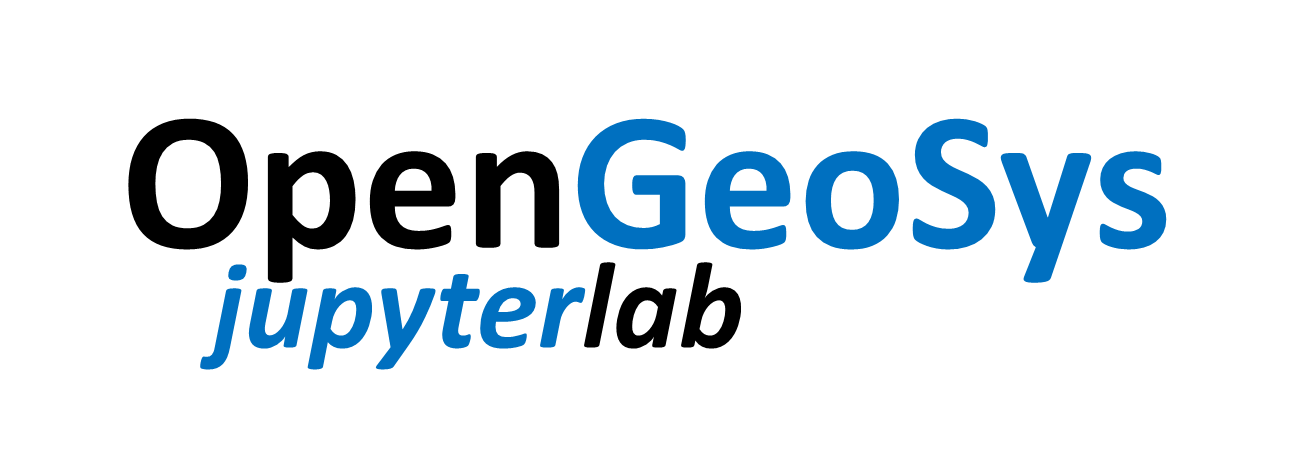

In [3]:
Image(filename = fig_dir + "ogs-jupyter-lab.png", width=150, height=100)

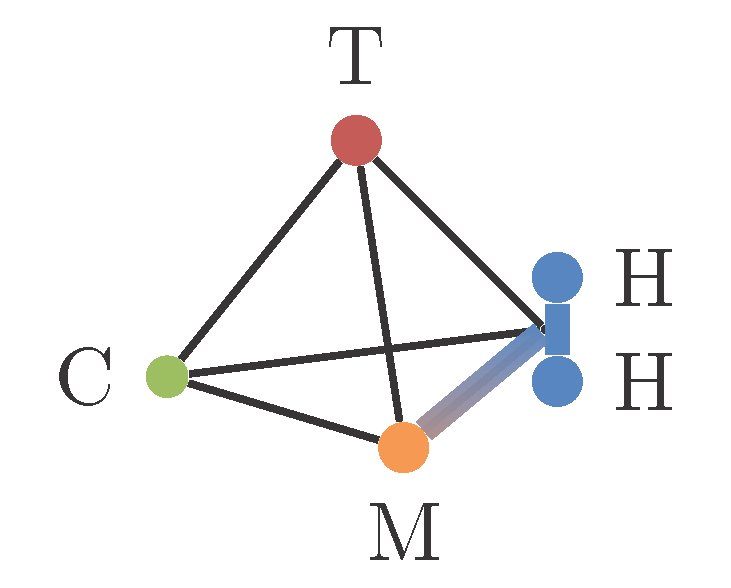

In [4]:
Image(filename = fig_dir + "h2m-tet.png", width=150, height=100)

In [5]:
#3-description (markdown)

## H2M process: Liakopoulos benchmark

**Problem description**

![](figures/liakopoulos.png)

The Liakopoulos experiment was dealing with a sand column which was filled with water first and then drained under gravity.
A sketch of the related model set-up including initial and boundary conditions is shown in the above figure.
A detailed description of the underlying OGS model is given in Grunwald et al. (2022). Two hydraulic models have been compared; two-phase flow with a mobile and a Richards flow with an immobile gas phase coupled to mechanical processes. Due to the absence of analytical solutions various numerical solutions have been compared in the past (see Grunwald et al., 2022).

The model parameters are given in the below table.

| Parameter | Value | Unit |
| :-: | :-: | :-: |
| Permeability | $k^0_\textrm{S}$ = 4.5 $\times$ 10$^{-13}$ | m$^2$ |
| Porosity | $\phi$ = 0.2975 | - |
| Young's modulus | $E$ = 1.3 | MPa |
| Poisson ratio | $\nu$ = 0.4 | - |
| Dynamic viscosity of gas phase | $\mu_\textrm{GR}$ = 1.8 $\times$ 10$^{-5}$ | Pa s |
| Dynamic viscosity of liquid phase | $\mu_\textrm{LR}$ = 1.0 $\times$ 10$^{-3}$ | Pa s |
| Density of liquid phase | $\rho_\textrm{LR}$ = 1.0$\times$ 10$^3$ | kg m$^{-3}$ |
| Density of solid phase | $\rho_\textrm{SR}$ = 2.0$\times$ 10$^3$ | kg m$^{-3}$ | 

**Numerical solution**

In [6]:
mesh = pv.read(vtu_mesh_file)
print("inspecting vtu_mesh_file")
mesh

inspecting vtu_mesh_file


UnstructuredGrid (0x177526680)
  N Cells:	100
  N Points:	202
  X Bounds:	0.000e+00, 1.000e-01
  Y Bounds:	0.000e+00, 1.000e+00
  Z Bounds:	0.000e+00, 0.000e+00
  N Arrays:	2

/Users/bilke/code/ogs/build/release/.venv/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(


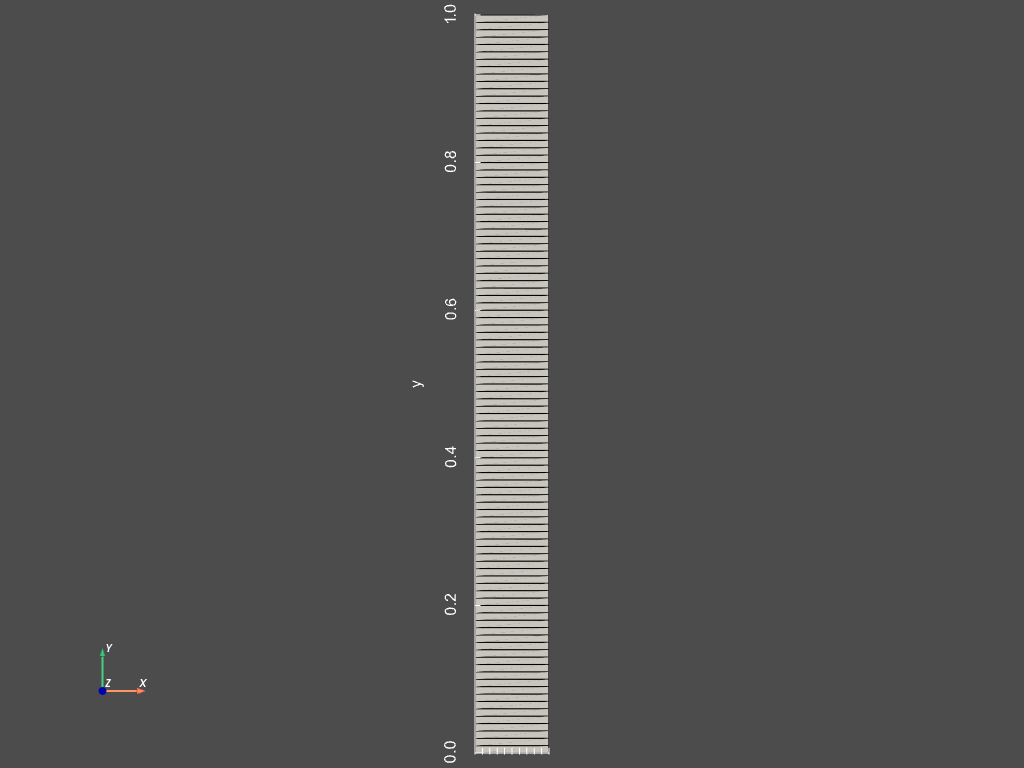

In [7]:
plotter = pv.Plotter()
plotter.add_mesh(mesh, show_edges=True)
plotter.view_xy()
plotter.add_axes()
plotter.show_bounds(mesh, xlabel="x", ylabel="y")
plotter.show()

**Running OGS**

In [8]:
#run ogs
import time
t0 = time.time()
print(f"ogs -o {out_dir} {prj_file_test} > {out_dir}/log.txt")
! ogs -o {out_dir} {prj_file_test} > {out_dir}/log.txt
tf = time.time()
print("computation time: ", round(tf - t0, 2), " s.")

ogs -o _out liakopoulos_TH2M.prj > _out/log.txt
computation time:  12.26  s.


**Spatial Profiles**

In [9]:
#alternative way
pv.set_plot_theme("document")
pv.set_jupyter_backend("static")
pt1 = (0,0,0)
pt2 = (0,1,0)
yaxis = pv.Line(pt1,pt2,resolution=2)
#print(yaxis)
line_mesh = mesh.slice_along_line(yaxis)
y_num = line_mesh.points[:,1]
reader = pv.get_reader(pvd_file_test)

In [10]:
reader.set_active_time_value(0.)
mesh = reader.read()[0]
line_mesh = mesh.slice_along_line(yaxis)
p_gas0 = line_mesh.point_data["gas_pressure"]
s_wat0 = line_mesh.point_data["saturation"]
p_cap0 = line_mesh.point_data["capillary_pressure"]
u_y0 = line_mesh.point_data["displacement"].T[1]

reader.set_active_time_value(120.)
mesh = reader.read()[0]
line_mesh = mesh.slice_along_line(yaxis)
p_gas120 = line_mesh.point_data["gas_pressure"]
s_wat120 = line_mesh.point_data["saturation"]
p_cap120 = line_mesh.point_data["capillary_pressure"]
u_y120 = line_mesh.point_data["displacement"].T[1]

reader.set_active_time_value(300.)
mesh = reader.read()[0]
line_mesh = mesh.slice_along_line(yaxis)
p_gas300 = line_mesh.point_data["gas_pressure"]
s_wat300 = line_mesh.point_data["saturation"]
p_cap300 = line_mesh.point_data["capillary_pressure"]
u_y300 = line_mesh.point_data["displacement"].T[1]

reader.set_active_time_value(4800.)
mesh = reader.read()[0]
line_mesh = mesh.slice_along_line(yaxis)
p_gas4800 = line_mesh.point_data["gas_pressure"]
s_wat4800 = line_mesh.point_data["saturation"]
p_cap4800 = line_mesh.point_data["capillary_pressure"]
u_y4800 = line_mesh.point_data["displacement"].T[1]

reader.set_active_time_value(7200.)
mesh = reader.read()[0]
line_mesh = mesh.slice_along_line(yaxis)
p_gas7200 = line_mesh.point_data["gas_pressure"]
s_wat7200 = line_mesh.point_data["saturation"]
p_cap7200 = line_mesh.point_data["capillary_pressure"]
u_y7200 = line_mesh.point_data["displacement"].T[1]


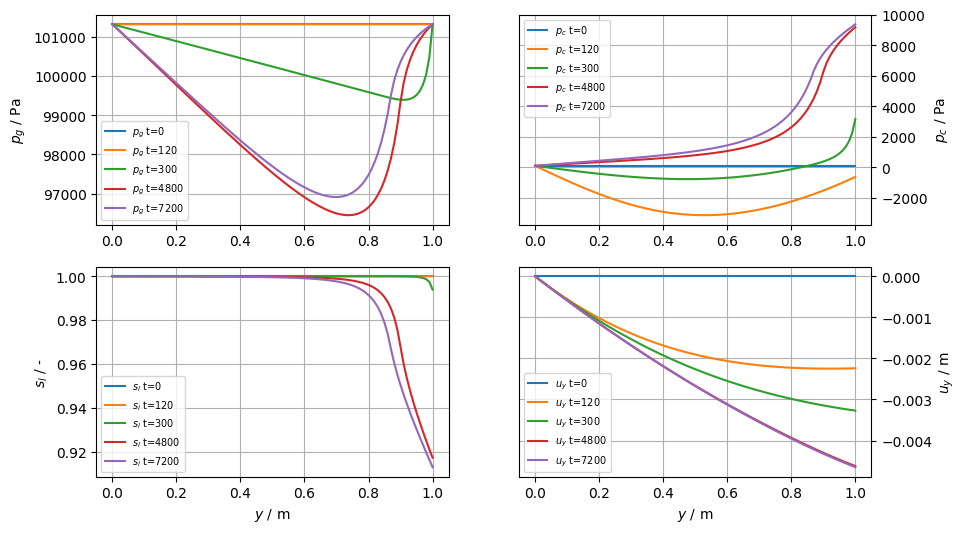

In [11]:
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['lines.color'] = 'red'
plt.rcParams['legend.fontsize'] = 7
fig1, (ax1, ax2) = plt.subplots(2,2)
ax1[0].set_ylabel(r"$p_g$ / Pa")
ax1[1].set_ylabel(r"$p_c$ / Pa")
ax1[1].yaxis.set_label_position("right")
ax1[1].yaxis.tick_right()
ax2[0].set_ylabel(r"$s_l$ / -")
ax2[1].set_ylabel(r"$u_y$ / m")
ax2[1].yaxis.set_label_position("right")
ax2[1].yaxis.tick_right()
ax2[0].set_xlabel(r"$y$ / m")
ax2[1].set_xlabel(r"$y$ / m")
#gas pressure
ax1[0].plot(y_num, p_gas0, label=r"$p_g$ t=0")
ax1[0].plot(y_num, p_gas120, label=r"$p_g$ t=120")
ax1[0].plot(y_num, p_gas300, label=r"$p_g$ t=300")
ax1[0].plot(y_num, p_gas4800, label=r"$p_g$ t=4800")
ax1[0].plot(y_num, p_gas7200, label=r"$p_g$ t=7200")
ax1[0].legend()
ax1[0].grid()
#capillary pressure
ax1[1].plot(y_num, p_cap0, label=r"$p_c$ t=0")
ax1[1].plot(y_num, p_cap120, label=r"$p_c$ t=120")
ax1[1].plot(y_num, p_cap300, label=r"$p_c$ t=300")
ax1[1].plot(y_num, p_cap4800, label=r"$p_c$ t=4800")
ax1[1].plot(y_num, p_cap7200, label=r"$p_c$ t=7200")
ax1[1].legend()
ax1[1].grid()
#liquid saturation
ax2[0].plot(y_num, s_wat0, label=r"$s_l$ t=0")
ax2[0].plot(y_num, s_wat120, label=r"$s_l$ t=120")
ax2[0].plot(y_num, s_wat300, label=r"$s_l$ t=300")
ax2[0].plot(y_num, s_wat4800, label=r"$s_l$ t=4800")
ax2[0].plot(y_num, s_wat7200, label=r"$s_l$ t=7200")
ax2[0].legend()
ax2[0].grid()
#vertical displacement
ax2[1].plot(y_num, u_y0, label=r"$u_y$ t=0")
ax2[1].plot(y_num, u_y120, label=r"$u_y$ t=120")
ax2[1].plot(y_num, u_y300, label=r"$u_y$ t=300")
ax2[1].plot(y_num, u_y4800, label=r"$u_y$ t=4800")
ax2[1].plot(y_num, u_y7200, label=r"$u_y$ t=7200")
ax2[1].legend()
ax2[1].grid()

**Contour plots**

Vertical cross-section
slight changes of interpolated values if defaults are/were used.


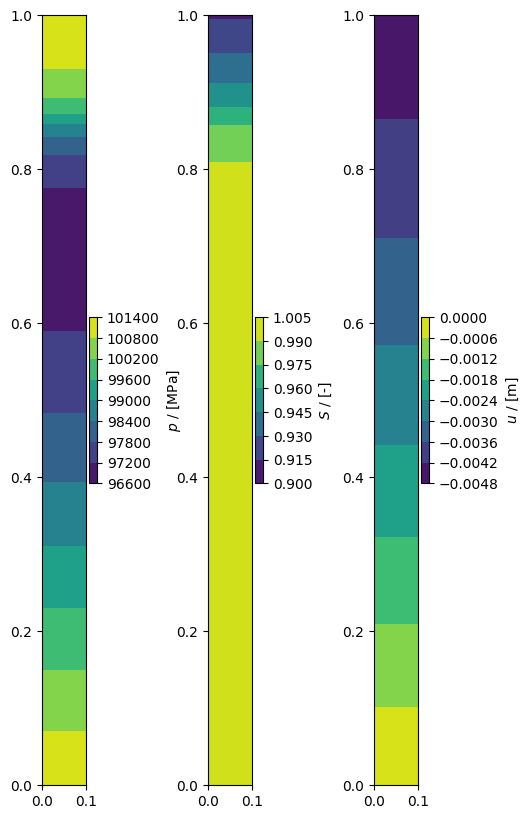

In [12]:
theme = "Vertical cross-section"
print(theme)
file_vtu = f"{out_dir}/result_liakopoulos_t_7200.vtu"
m_plot=vtuIO.VTUIO(file_vtu, dim=2)
triang=tri.Triangulation(m_plot.points[:,0],m_plot.points[:,1])
p_plot = m_plot.get_point_field("gas_pressure")
s_plot = m_plot.get_point_field("saturation")
u_plot = m_plot.get_point_field("displacement").T[1]
fig, ax = plt.subplots(ncols=3, figsize=(5,10))
plt.subplots_adjust(wspace=2)
#fig.tight_layout()
#plt.subplot_tool()
contour_left = ax[0].tricontourf(triang, p_plot)
contour_mid = ax[1].tricontourf(triang, s_plot)
contour_right = ax[2].tricontourf(triang, u_plot)
fig.colorbar(contour_left,ax=ax[0],label='$p$ / [MPa]')
fig.colorbar(contour_mid,ax=ax[1],label='$S$ / [-]')
fig.colorbar(contour_right,ax=ax[2],label='$u$ / [m]')
plt.show()

**OGS links**
- description: https://www.opengeosys.org/docs/benchmarks/
- project file: https://gitlab.opengeosys.org/ogs/ogs/-/blob/master/Tests/Data/TH2M/H2M/Liakopoulos/liakopoulos_TH2M.prj

**Credits**
- Norbert Grunwald for set-up the OGS benchmark, https://gitlab.opengeosys.org/ogs/ogs/-/blob/master/Tests/Data/TH2M/H2M/Liakopoulos/liakopoulos_TH2M.prj

**References**

Grunwald, N., Lehmann, C., Maßmann, J., Naumov, D., Kolditz, O., Nagel, T., (2022): Non-isothermal two-phase flow in deformable porous media: systematic open-source implementation and verification procedure. Geomech. Geophys. Geo-Energy Geo-Resour. 8 (3), art. 107
        https://doi.org/10.1007/s40948-022-00394-2

Kolditz, O., Görke, U.-J., Shao, H., Wang, W., (eds., 2012): Thermo-hydro-mechanical-chemical processes in porous media: Benchmarks and examples. Lecture Notes in Computational Science and Engineering 86, Springer, Berlin, Heidelberg, 391 pp
        https://link.springer.com/book/10.1007/978-3-642-27177-9

Lewis RW, Schrefler BA (1998): The finite element method in the static and dynamic deformation and consolidation of porous media. Wiley, New York
    https://www.wiley.com/en-us/The+Finite+Element+Method+in+the+Static+and+Dynamic+Deformation+and+Consolidation+of+Porous+Media%2C+2nd+Edition-p-9780471928096

Liakopoulos AC (1964): Transient flow through unsaturated porous media. PhD thesis. University of California, Berkeley, USA.
sources: OGS BMB1 (sec. 13.2